# Analyse Exploratoire des Données (EDA)

## Introduction

Ce notebook a pour objectif de conduire une analyse exploratoire approfondie de notre jeu de données. Nous allons aborder l'EDA en deux grandes parties : l'analyse de **forme** et l'analyse de **fond**.

### 1. Analyse de Forme

Dans cette première partie, nous nous concentrons sur la structure globale du jeu de données. Nous examinerons notamment :

- **La structure du dataset** : nombre d'observations, nombre de variables et types de données (quantitatives vs. qualitatives).
- **La qualité des données** : détection des valeurs manquantes, des doublons et d'éventuelles anomalies.
- **La distribution initiale des variables** : aperçu des statistiques descriptives de base pour comprendre la portée et la densité des données.

### 2. Analyse de Fond

Une fois la forme du dataset bien comprise, nous approfondirons l'analyse en explorant le contenu des données :

- **Analyse univariée des variables quantitatives**  
  Nous étudierons la distribution de chaque variable numérique (moyenne, médiane, écart-type, etc.), afin d'identifier les éventuelles valeurs aberrantes et d'avoir une première vision des tendances.

- **Analyse de la classification de la variable cible par rapport aux variables quantitatives**  
  Cette étape consiste à observer comment la variable cible se comporte en fonction des variables numériques, en mettant en évidence d'éventuelles différences significatives entre les groupes.

- **Relations bivariées entre variables quantitatives**  
  Nous explorerons les interactions entre les variables numériques à l'aide de visualisations et de mesures de corrélation. Cette analyse permettra de déceler d'éventuelles interdépendances et patterns.

- **Analyse univariée des variables qualitatives**  
  Une attention particulière sera accordée aux variables catégorielles pour étudier leur répartition, leur fréquence et leur impact sur le dataset.

- **Relation entre la variable cible et les variables quantitatives**  
  Nous approfondirons l'analyse en étudiant la manière dont les variables numériques influencent ou se distinguent selon la classification de la variable cible.

L'ensemble de ces étapes permettra de mieux comprendre les dynamiques présentes dans nos données et de préparer le terrain pour une modélisation efficace et pertinente.


# Importation des librairies

In [3]:
import os
import sys

sys.path.append("..")

# Basic Libraries
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from settings import PROJECT_PATH

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Importation du fichier

In [5]:
columns_to_load=[ 'date_transaction', 'prix', 'departement',
       'ville', 'type_batiment', 'vefa', 'n_pieces',
       'surface_habitable', 'latitude', 'longitude',
       'mois_transaction', 'annee_transaction', 'prix_m2', 'prix_m2_moyen',
       'nb_transactions_mois', 'en_dessous_du_marche',
       'nom_departement',  'nom_region']
table= pq.read_table(os.path.join(PROJECT_PATH,'data/raw/transactions_immobilieres.parquet'),columns=columns_to_load)
# Convertir en DataFrame Pandas
data = table.to_pandas()

data.head()

,date_transaction,prix,departement,ville,type_batiment,vefa,n_pieces,surface_habitable,latitude,longitude,mois_transaction,annee_transaction,prix_m2,prix_m2_moyen,nb_transactions_mois,en_dessous_du_marche,nom_departement,nom_region
0,2018-01-03,98000.0,1,BOURG-EN-BRESSE,Appartement,0,3,70,46.204952,5.225964,1,2018,1400.000000,1229.764459,17,0,Ain,Auvergne-Rhône-Alpes
1,2018-01-04,225000.0,1,DIVONNE-LES-BAINS,Appartement,0,2,56,46.355345,6.137488,1,2018,4017.857143,4512.419826,9,1,Ain,Auvergne-Rhône-Alpes
2,2018-01-04,67000.0,1,BOURG-EN-BRESSE,Appartement,0,1,45,46.201122,5.237210,1,2018,1488.888889,1229.764459,17,0,Ain,Auvergne-Rhône-Alpes
3,2018-01-05,503000.0,1,DIVONNE-LES-BAINS,Appartement,0,3,82,46.358948,6.145611,1,2018,6134.146341,4512.419826,9,0,Ain,Auvergne-Rhône-Alpes
4,2018-01-05,339000.0,1,DIVONNE-LES-BAINS,Appartement,0,3,68,46.360953,6.137112,1,2018,4985.294118,4512.419826,9,0,Ain,Auvergne-Rhône-Alpes


# Analyse de forme

In [6]:
df= data.copy()

In [7]:
df.shape


(529460, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529460 entries, 0 to 529459
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date_transaction      529460 non-null  datetime64[ns]
 1   prix                  529460 non-null  float64       
 2   departement           529460 non-null  int32         
 3   ville                 529460 non-null  object        
 4   type_batiment         529460 non-null  object        
 5   vefa                  529460 non-null  int32         
 6   n_pieces              529460 non-null  int32         
 7   surface_habitable     529460 non-null  int32         
 8   latitude              529460 non-null  float64       
 9   longitude             529460 non-null  float64       
 10  mois_transaction      529460 non-null  int32         
 11  annee_transaction     529460 non-null  int32         
 12  prix_m2               529460 non-null  float64       
 13 

In [9]:
df.isnull().mean()

date_transaction        0.0
prix                    0.0
departement             0.0
ville                   0.0
type_batiment           0.0
vefa                    0.0
n_pieces                0.0
surface_habitable       0.0
latitude                0.0
longitude               0.0
mois_transaction        0.0
annee_transaction       0.0
prix_m2                 0.0
prix_m2_moyen           0.0
nb_transactions_mois    0.0
en_dessous_du_marche    0.0
nom_departement         0.0
nom_region              0.0
dtype: float64

## Conclusions analyse de forme

**regression target :** "prix"

**classification target :** "en_dessous_du_marche"

**lignes et colonnes :** 529460 lignes, 26 colonnes

**types de variables :** datetime64[ns](1), float64(5), int32(11), int64(1), object(7), uint32(1)

**Analyse des valeurs manquantes :** On dénombre aucune valeurs manquantes dans le dataset


# Analyse de fond

## Analyse classification target

In [31]:
target_rate=df['en_dessous_du_marche'].value_counts(normalize=True)
target_sum=df['en_dessous_du_marche'].value_counts()

pd.DataFrame( {'Nombre ':target_sum,
             'Pourcentage ': target_rate})

,Nombre,Pourcentage
en_dessous_du_marche,,
0,333519,0.629923
1,195941,0.370077


<Axes: title={'center': 'Taux de biens en-dessous du marché'}, xlabel='en_dessous_du_marche'>

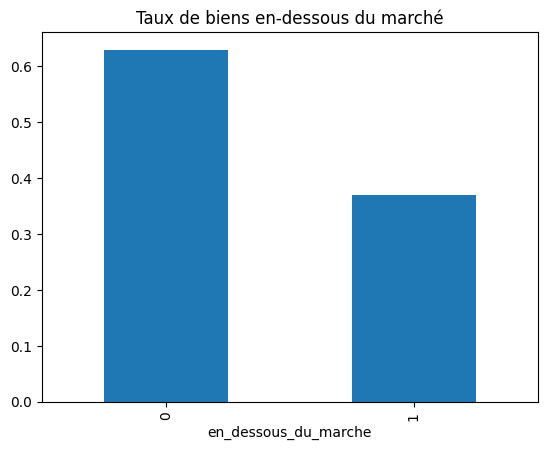

In [33]:
target_rate.plot.bar(title='Taux de biens en-dessous du marché')

## Analyse variables quantitatives

In [11]:
df.describe()

,date_transaction,prix,departement,vefa,n_pieces,surface_habitable,latitude,longitude,mois_transaction,annee_transaction,prix_m2,prix_m2_moyen,nb_transactions_mois,en_dessous_du_marche
count,529460,5.294600e+05,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000,529460.000000
mean,2020-03-06 05:06:35.207192576,2.431827e+05,57.383821,0.026657,2.403866,51.190392,46.147278,3.509348,6.441803,2019.683359,5087.885720,5087.885720,80.636736,0.370077
min,2018-01-02 00:00:00,1.500000e-01,1.000000,0.000000,0.000000,1.000000,42.440228,-1.785451,1.000000,2018.000000,0.001818,253.363593,5.000000,0.000000
25%,2019-01-09 00:00:00,1.026235e+05,31.000000,0.000000,1.000000,30.000000,43.608963,2.303872,3.000000,2019.000000,2375.000000,2710.041533,15.000000,0.000000
50%,2019-12-18 00:00:00,1.680000e+05,74.000000,0.000000,2.000000,46.000000,45.754655,2.468619,6.000000,2019.000000,3912.323804,4032.651301,40.000000,0.000000
75%,2021-02-12 00:00:00,2.865000e+05,78.000000,0.000000,3.000000,66.000000,48.852277,5.387485,9.000000,2021.000000,7058.823529,7178.815261,105.000000,1.000000
max,2023-06-30 00:00:00,1.934600e+07,95.000000,1.000000,41.000000,1214.000000,49.147181,7.597206,12.000000,2023.000000,420000.000000,27146.698019,606.000000,1.000000
std,NaN,2.784848e+05,30.669486,0.161080,1.223067,29.847745,2.432219,2.148772,3.431160,1.415263,3877.838264,3142.075849,100.496278,0.482826


### Histplot

In [12]:
import logging

# Désactive les messages d'avertissement concernant les polices
matplotlib.rcParams['axes.unicode_minus'] = False

# Désactiver les messages de recherche de polices
logging.getLogger('matplotlib.font_manager').disabled = True

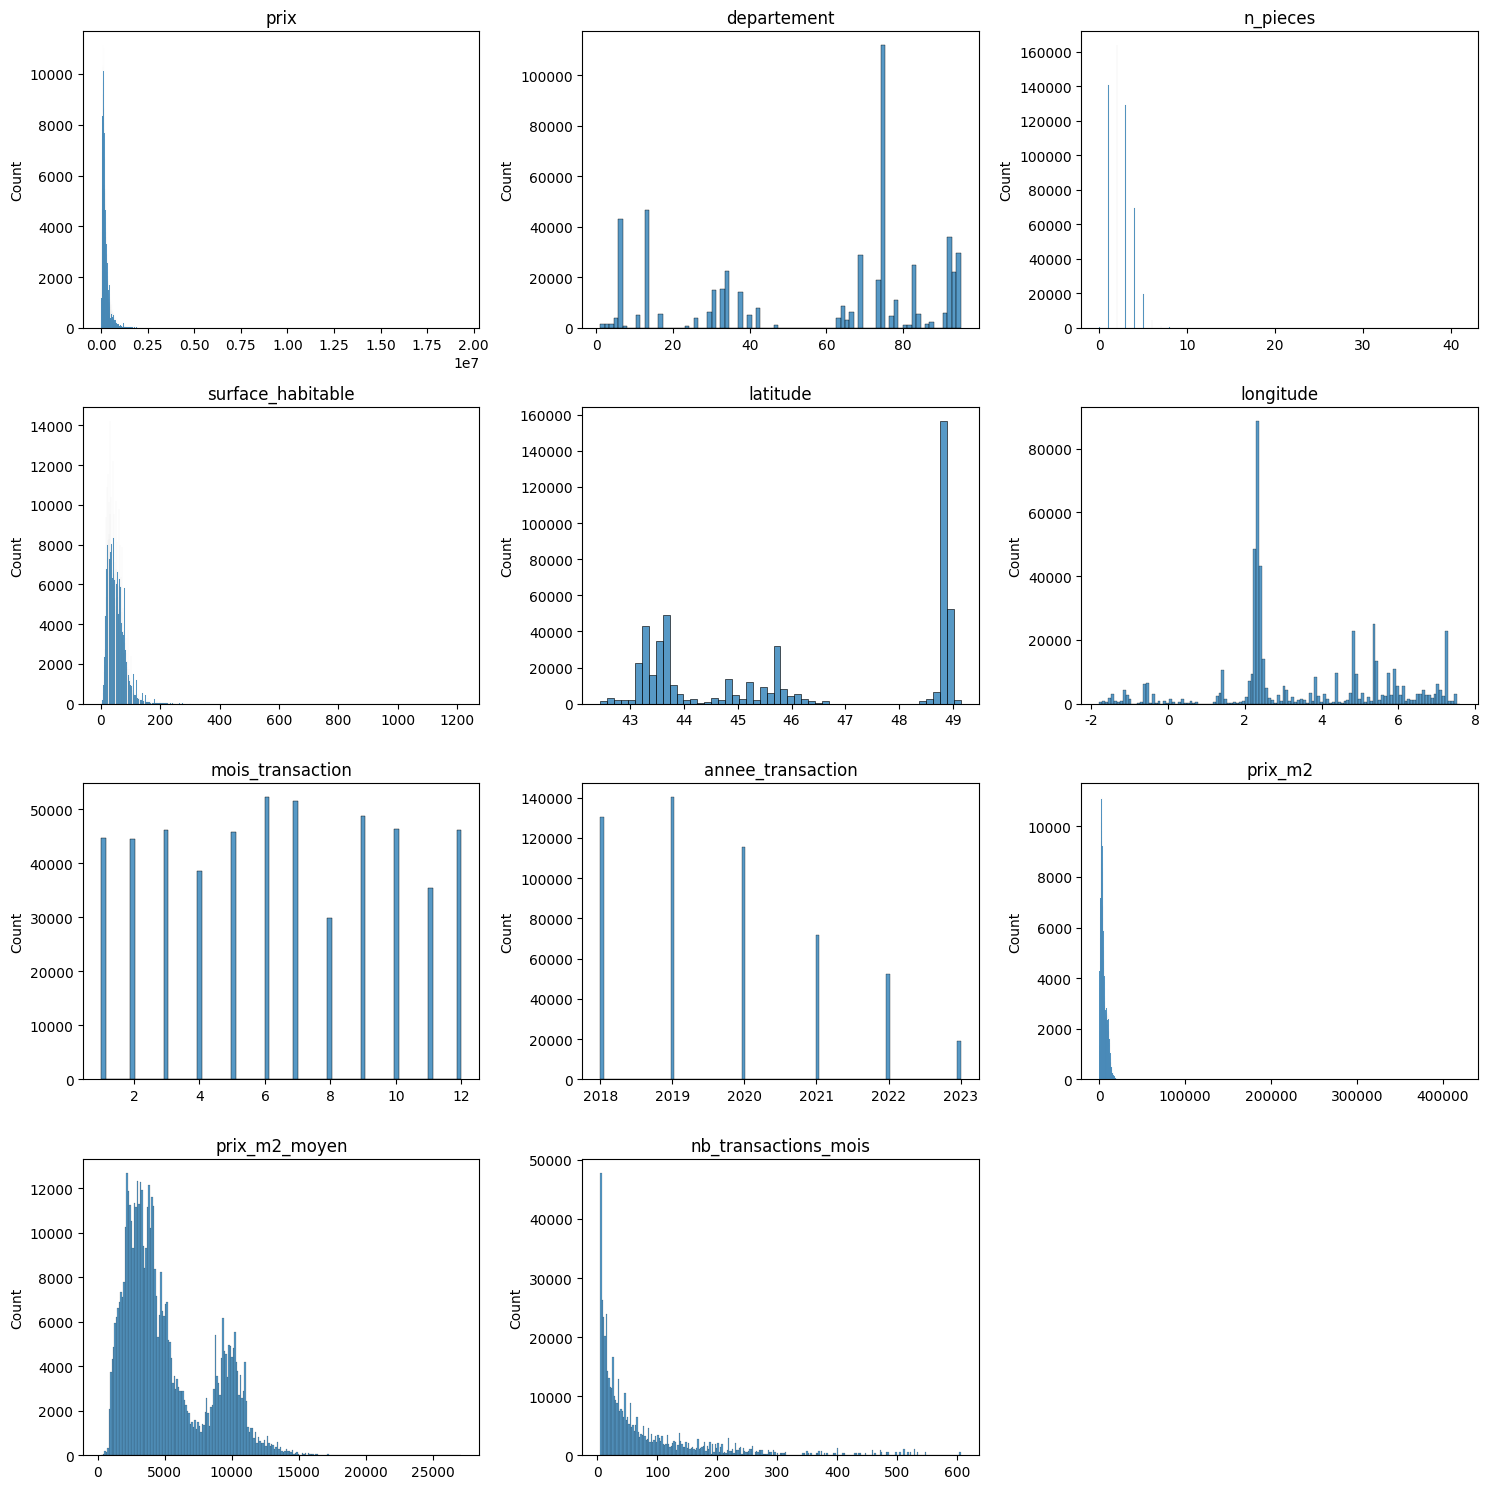

In [13]:
# Sélectionner les colonnes quantitatives uniquement
numerical_features = df.select_dtypes(include=['float64', 'int32', 'int64', 'uint32']).drop(['en_dessous_du_marche','vefa'],axis=1).columns
# Calcul des lignes et des colonnes en fonction du nombre de graphiques
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))
plt.figure(figsize=(15,15))
for i, col in enumerate (numerical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.histplot(df[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Boxplot

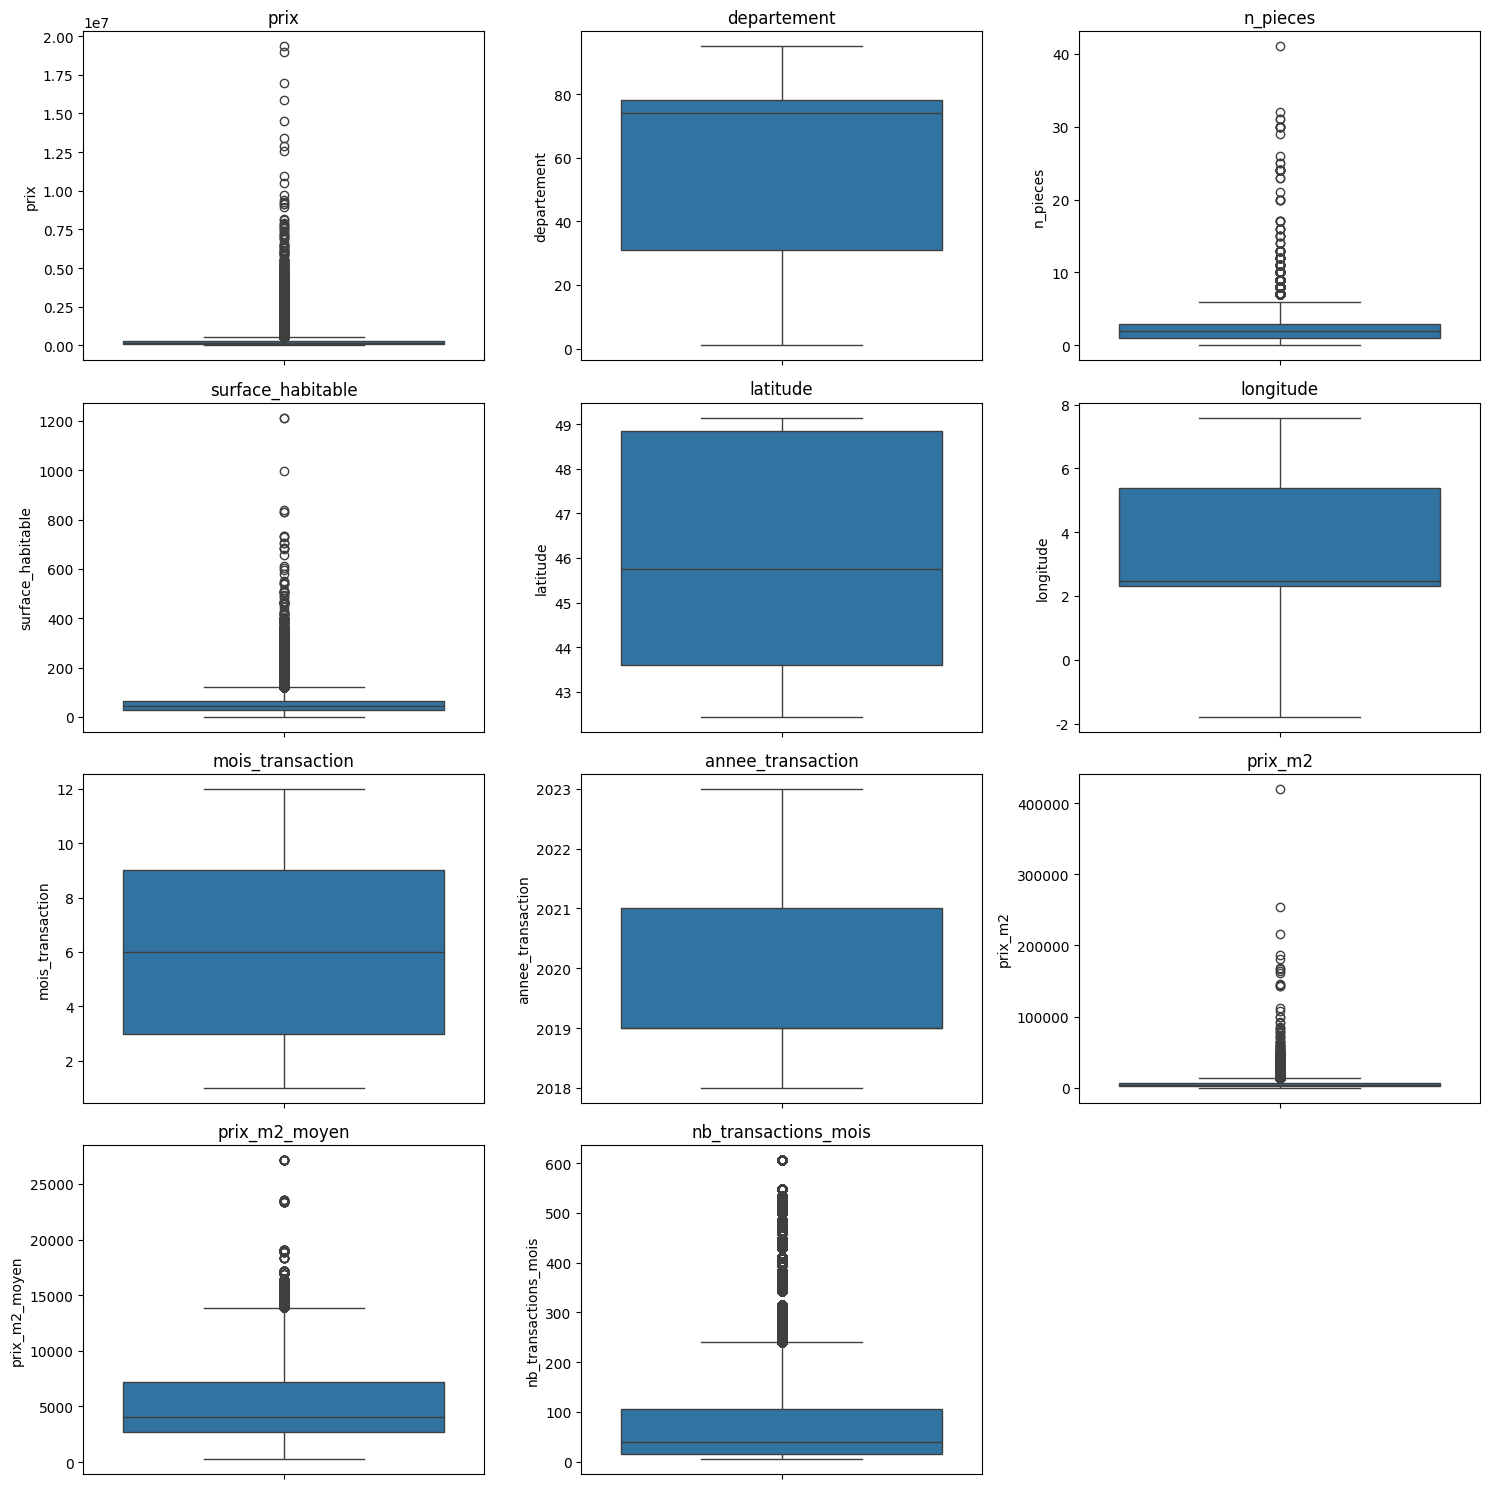

In [14]:
plt.figure(figsize=(15,15))
for i, col in enumerate (numerical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# **Analyse exploratoire des données (EDA)**

## **1. Analyse des distributions (Histogrammes)**
### **Prix**
- Distribution très asymétrique à droite.
- La majorité des transactions se situent à des prix relativement bas.
- Présence de valeurs extrêmes très élevées.

### **Surface habitable**
- Forte concentration des biens dans les petites surfaces.
- Quelques valeurs très élevées qui influencent la distribution.

### **Nombre de pièces (`n_pieces`)**
- La plupart des logements ont peu de pièces.
- Forte décroissance après 5-6 pièces.

### **Prix au m² (`prix_m2`, `prix_m2_moyen`)**
- Très concentré dans les faibles valeurs.
- Quelques valeurs très élevées.

### **Nombre de transactions par mois (`nb_transactions_mois`)**
- Suit une loi de puissance : peu de mois avec un très grand nombre de transactions.

### **Latitude et Longitude**
- Forte densité dans certaines zones géographiques.

### **Mois et Année de transaction**
- Les données s’étendent sur plusieurs années.
- Pics de transactions à certains mois spécifiques.

---

## **2. Analyse des boxplots**
### **Présence d’outliers**
- Les variables `prix`, `surface_habitable`, `prix_m2`, `nb_transactions_mois` contiennent de nombreux outliers.
- Ces valeurs extrêmes pourraient être des erreurs ou des biens atypiques (très luxueux ou très grands).

### **Dispersion des données**
- Variables géographiques (`département`, `latitude`, `longitude`) bien réparties.
- `Mois` et `Année de transaction` ne présentent pas d'outliers (logique pour des données temporelles).

---

## **3. Conclusions**
- **Distributions fortement asymétriques** pour les variables `prix`, `surface_habitable`, `nb_transactions_mois`.
- **Présence de valeurs extrêmes** qui pourraient nécessiter un traitement spécifique (log-transformation, Winsorization).
- **Les tendances temporelles mériteraient une analyse plus approfondie**, notamment pour étudier l’évolution des prix et du volume des transactions.



## Relation classification target/variables quantitatives

In [15]:
df_endessous = df.loc[df['en_dessous_du_marche']==1]
df_audessus = df.loc[df['en_dessous_du_marche']==0]

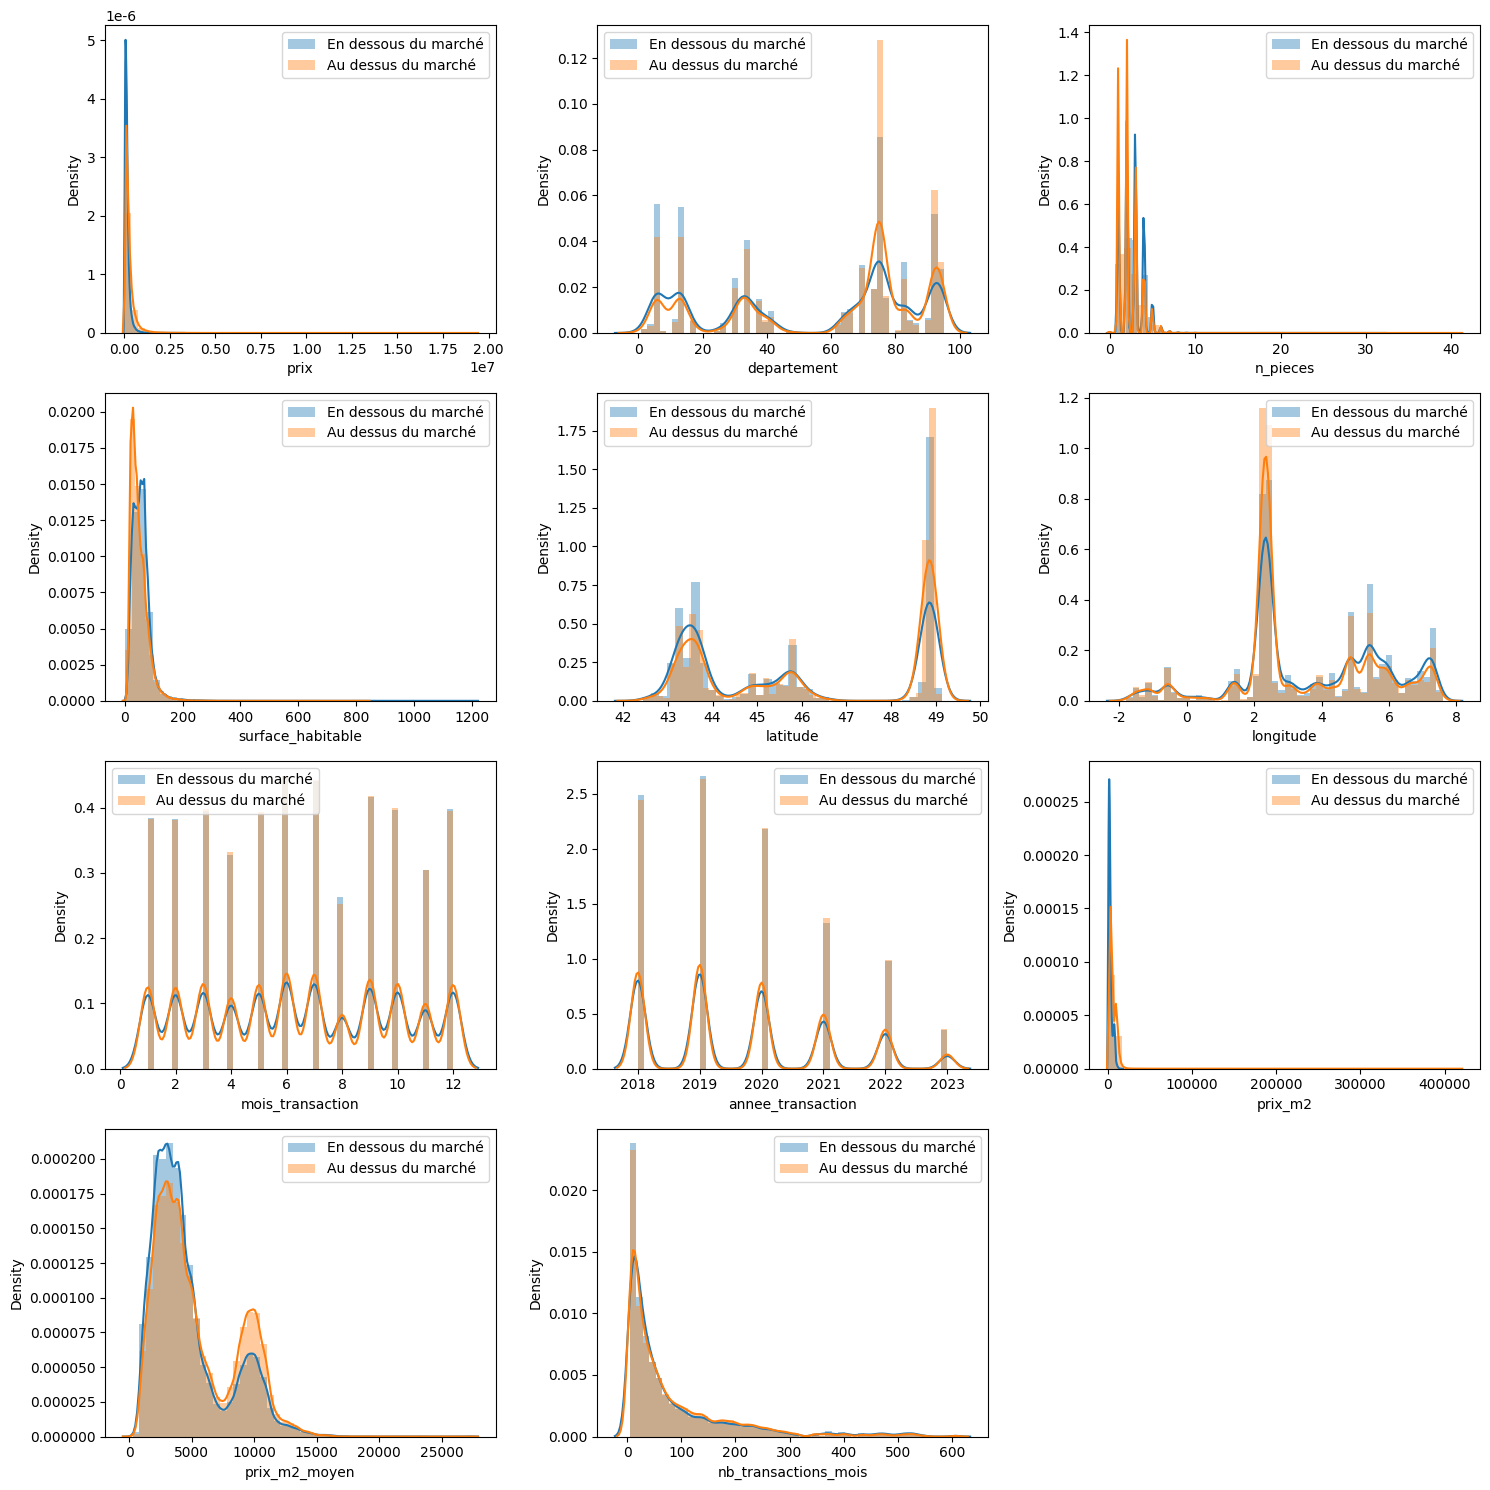

In [16]:
plt.figure(figsize=(15,15))
for i,col in enumerate (numerical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.distplot(df_endessous[col], label= 'En dessous du marché')
    sns.distplot(df_audessus[col], label= 'Au dessus du marché')
    plt.legend()
plt.tight_layout()
plt.show()

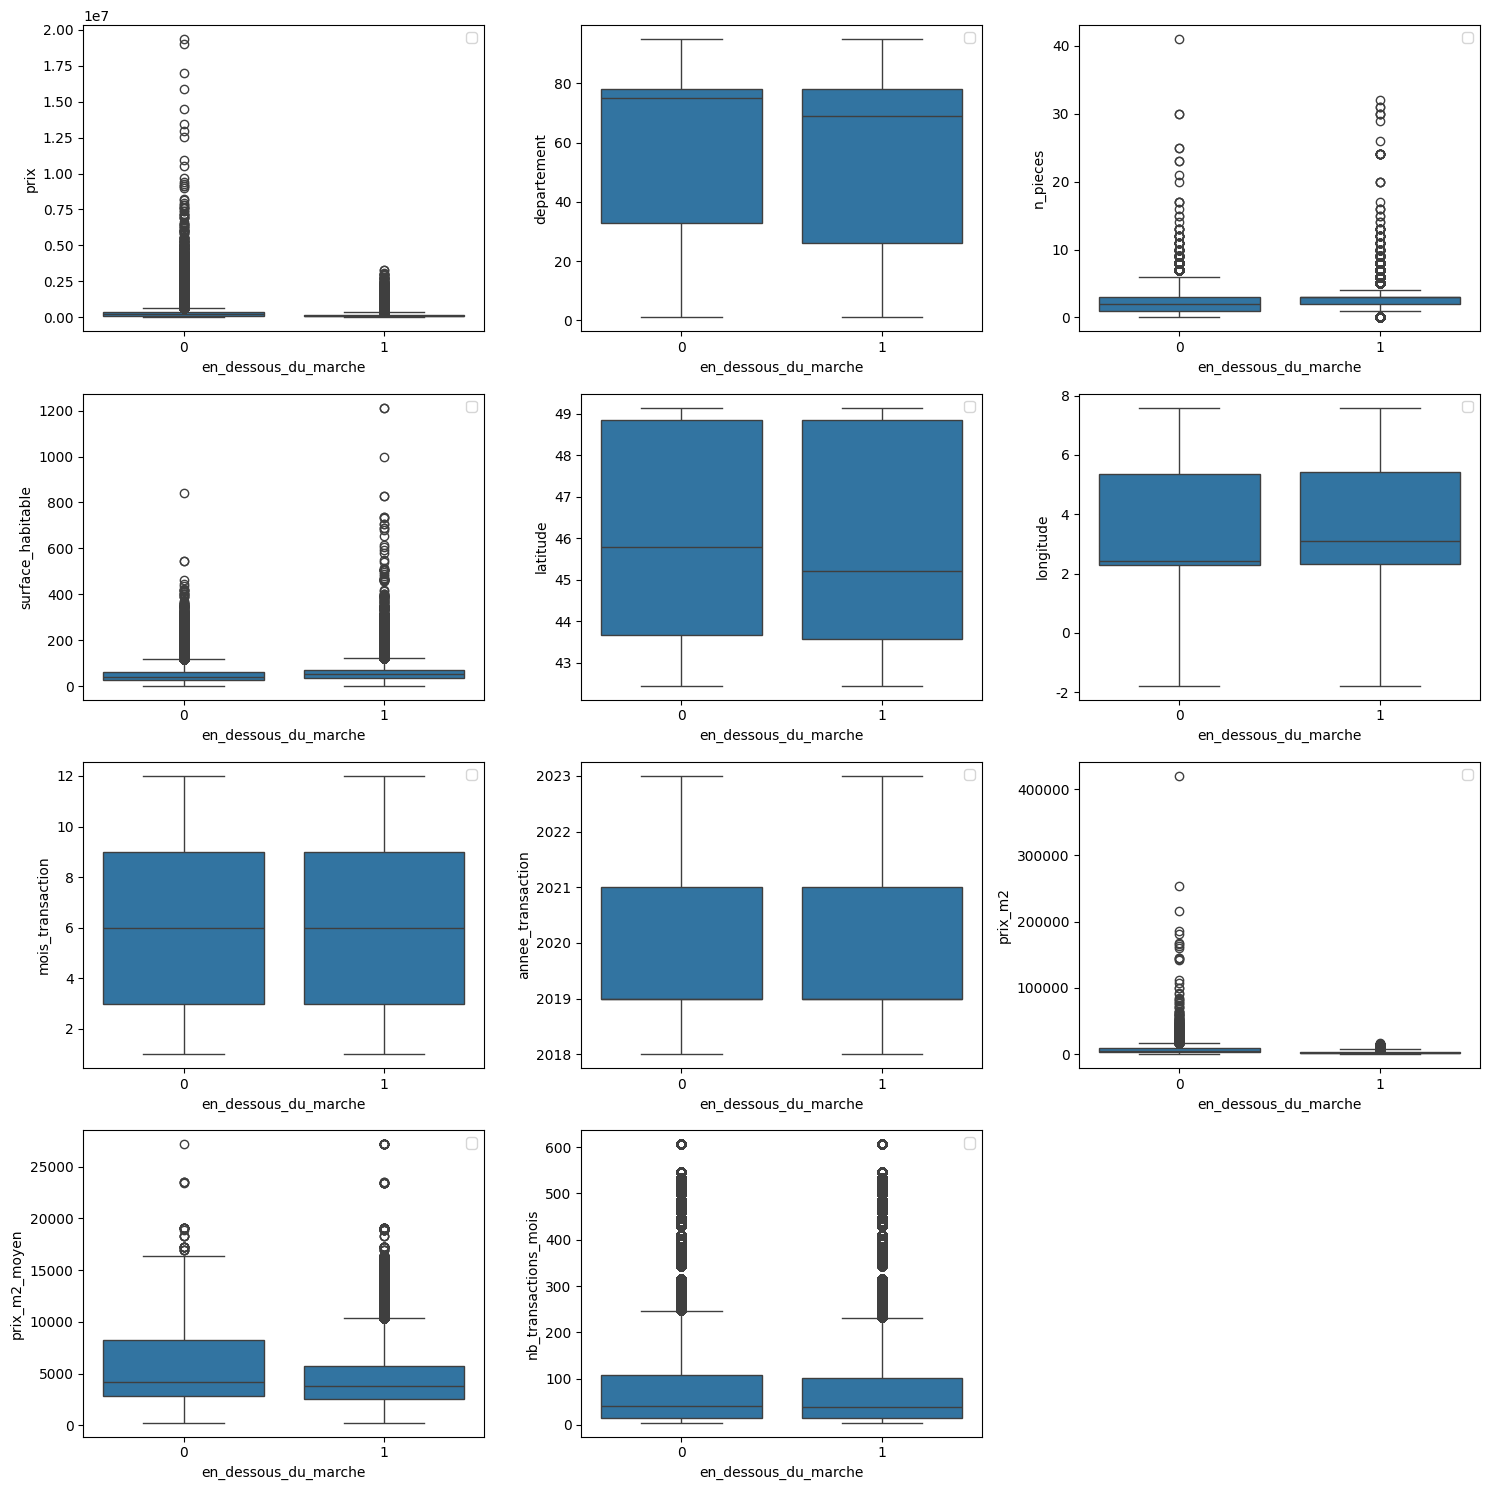

In [17]:
plt.figure(figsize=(15,15))
for i,col in enumerate (numerical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.boxplot(x='en_dessous_du_marche', y=col, data=df)
    plt.legend()
plt.tight_layout()
plt.show()

# Analyse des distributions par catégorie de marché

## Comparaison des distributions

### Prix
- Très asymétrique à droite pour les deux catégories.
- Les transactions "Au dessus du marché" ont une queue plus étendue vers les valeurs élevées.

### Département
- Distribution multimodale avec des pics pour certains départements.
- Répartition similaire entre les deux catégories, avec quelques variations.

### Nombre de pièces (`n_pieces`)
- La majorité des logements ont peu de pièces.
- Peu de différence visible entre les deux catégories.

### Surface habitable
- Les logements "Au dessus du marché" ont tendance à être légèrement plus grands.
- Répartition concentrée vers les petites surfaces.

### Latitude et Longitude
- Forte densité autour de certaines valeurs spécifiques.
- Peu de différences majeures visibles.

### Mois et Année de transaction
- Distribution en pics, indiquant une saisonnalité.
- Répartition quasi-identique entre les deux catégories.

### Prix au m² (`prix_m2`, `prix_m2_moyen`)
- Fortement asymétrique, avec une majorité des biens sous les 5000 €/m².
- Les biens "Au dessus du marché" ont une queue plus longue vers les valeurs élevées.

### Nombre de transactions par mois (`nb_transactions_mois`)
- Suivi d’une loi de puissance : peu de mois avec un grand nombre de transactions.
- Pas de différence significative entre les deux catégories.

## Conclusions
- **Les distributions sont globalement similaires entre les deux catégories**, avec quelques variations :
  - **Prix** : queue plus longue vers les prix élevés pour "Au dessus du marché".
  - **Surface habitable** : légèrement plus grande pour "Au dessus du marché".
  - **Prix au m²** : plus élevé pour "Au dessus du marché".
- **Pas de différence majeure sur les caractéristiques géographiques ou temporelles.**


## Relation entre variables quantitatives

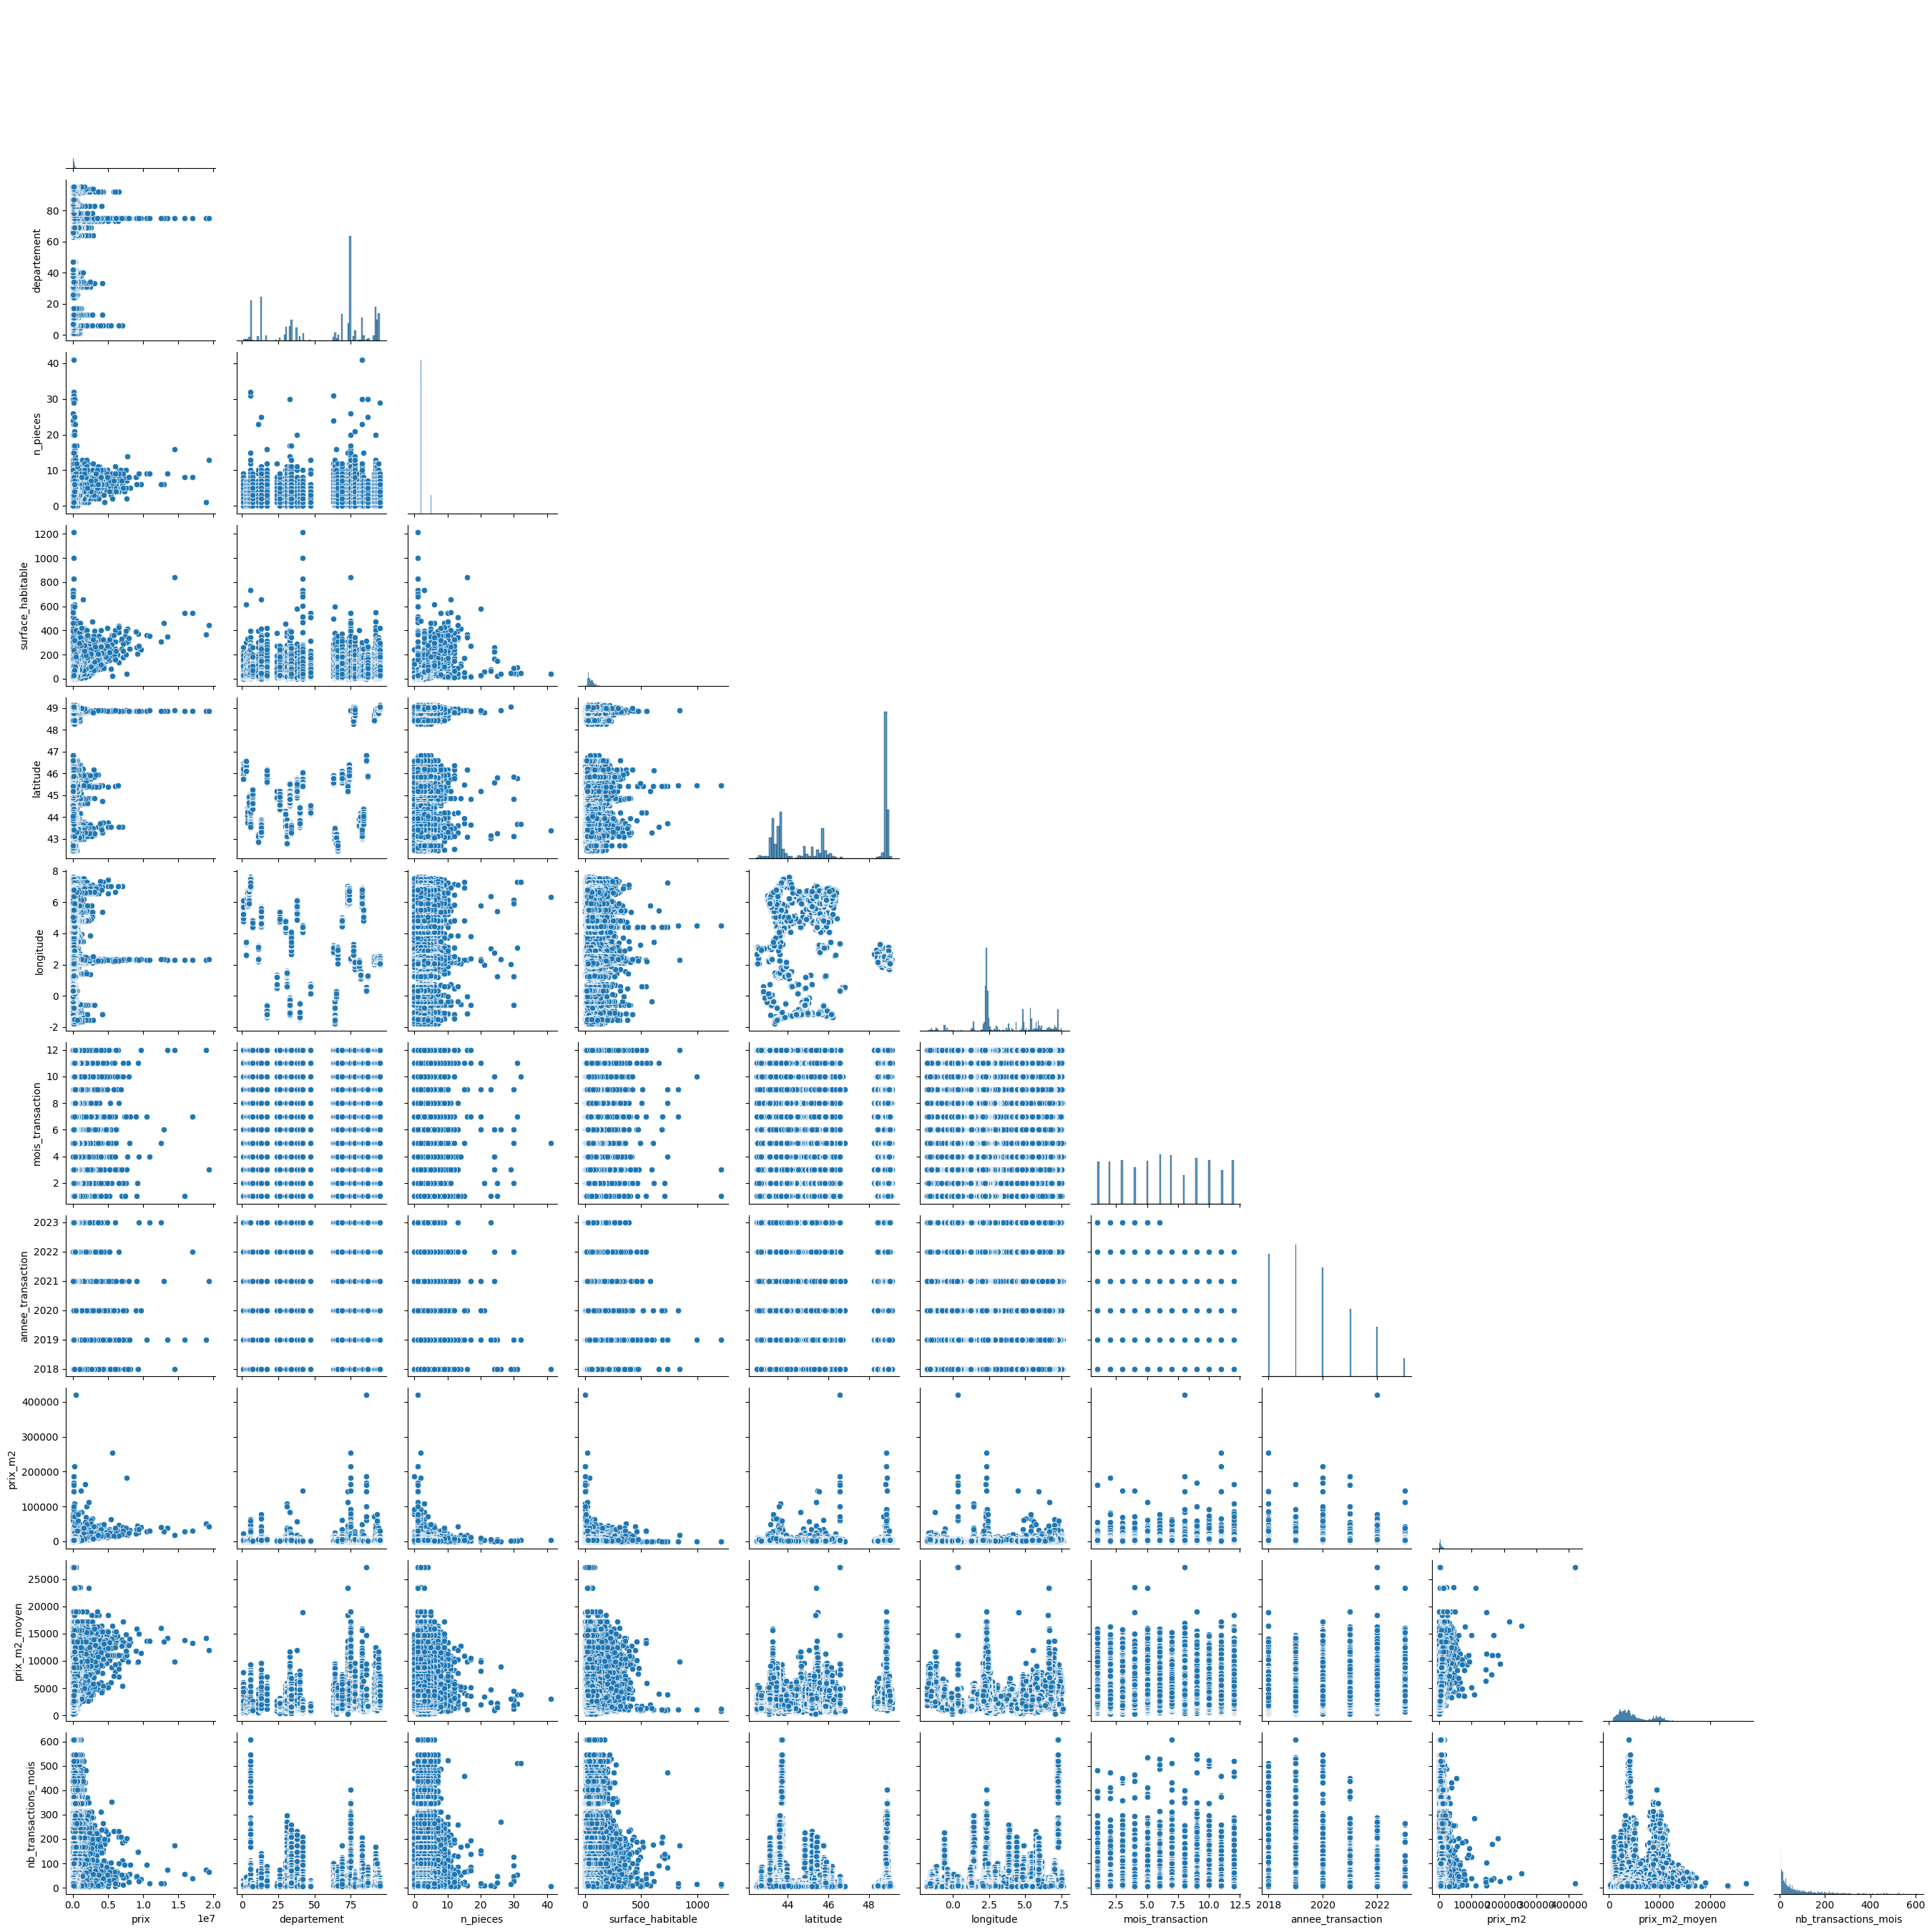

In [18]:
# Visualisation sous forme de pairplot
sns.pairplot(df[numerical_features],  corner= True)

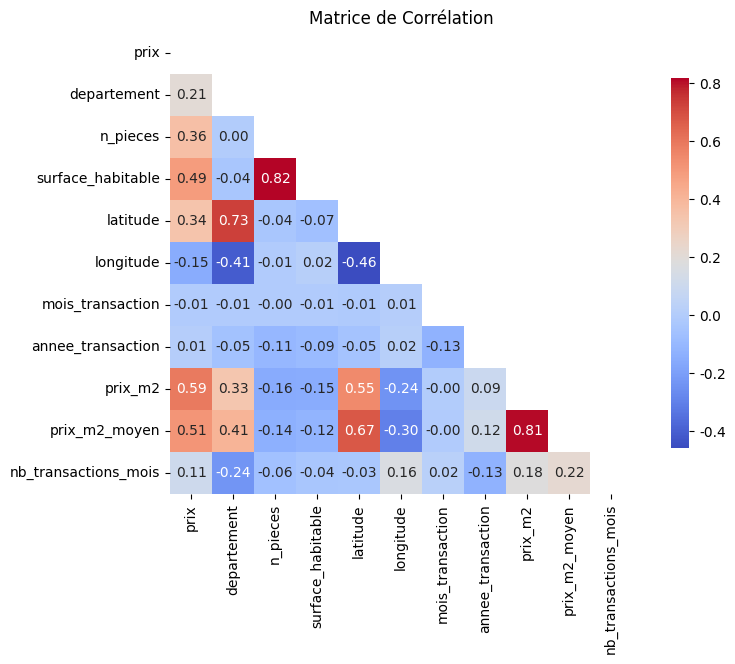

In [19]:
# Affichage de la matrice de corrélation avec un heatmap
correlation_matrix=df[numerical_features].corr()
# Création d'un masque pour n'afficher que la demi-heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix,mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matrice de Corrélation')
plt.show()

## Analyse variables quantitatives

In [20]:
categorical_features = [col for col in df.columns if col not in numerical_features]
categorical_features

['date_transaction',
 'ville',
 'type_batiment',
 'vefa',
 'en_dessous_du_marche',
 'nom_departement',
 'nom_region']

In [24]:
df.describe(include=['object', 'category'])

,ville,type_batiment,nom_departement,nom_region
count,529460,529460,529460,529460
unique,1035,2,40,5
top,NICE,Appartement,Paris,Île-de-France
freq,23940,500087,111725,221402


### Countplot

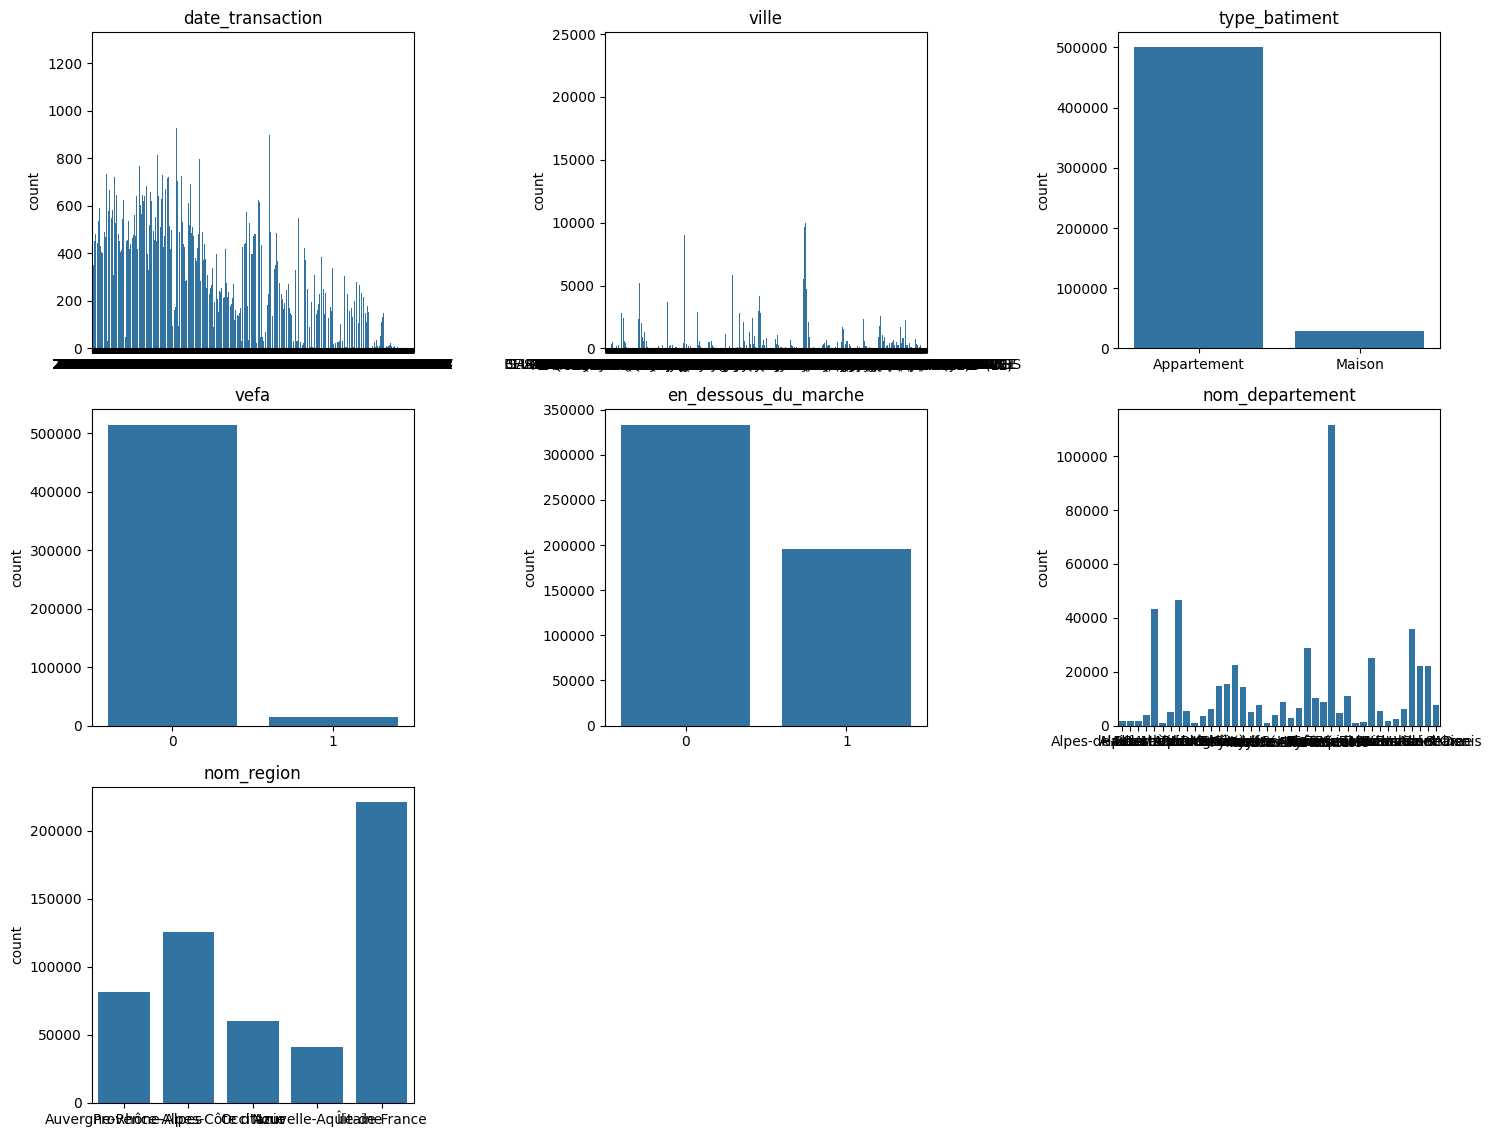

In [36]:
plt.figure(figsize=(15,15))
for i, col in enumerate (categorical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

## Relation classification target/variables quantitatives

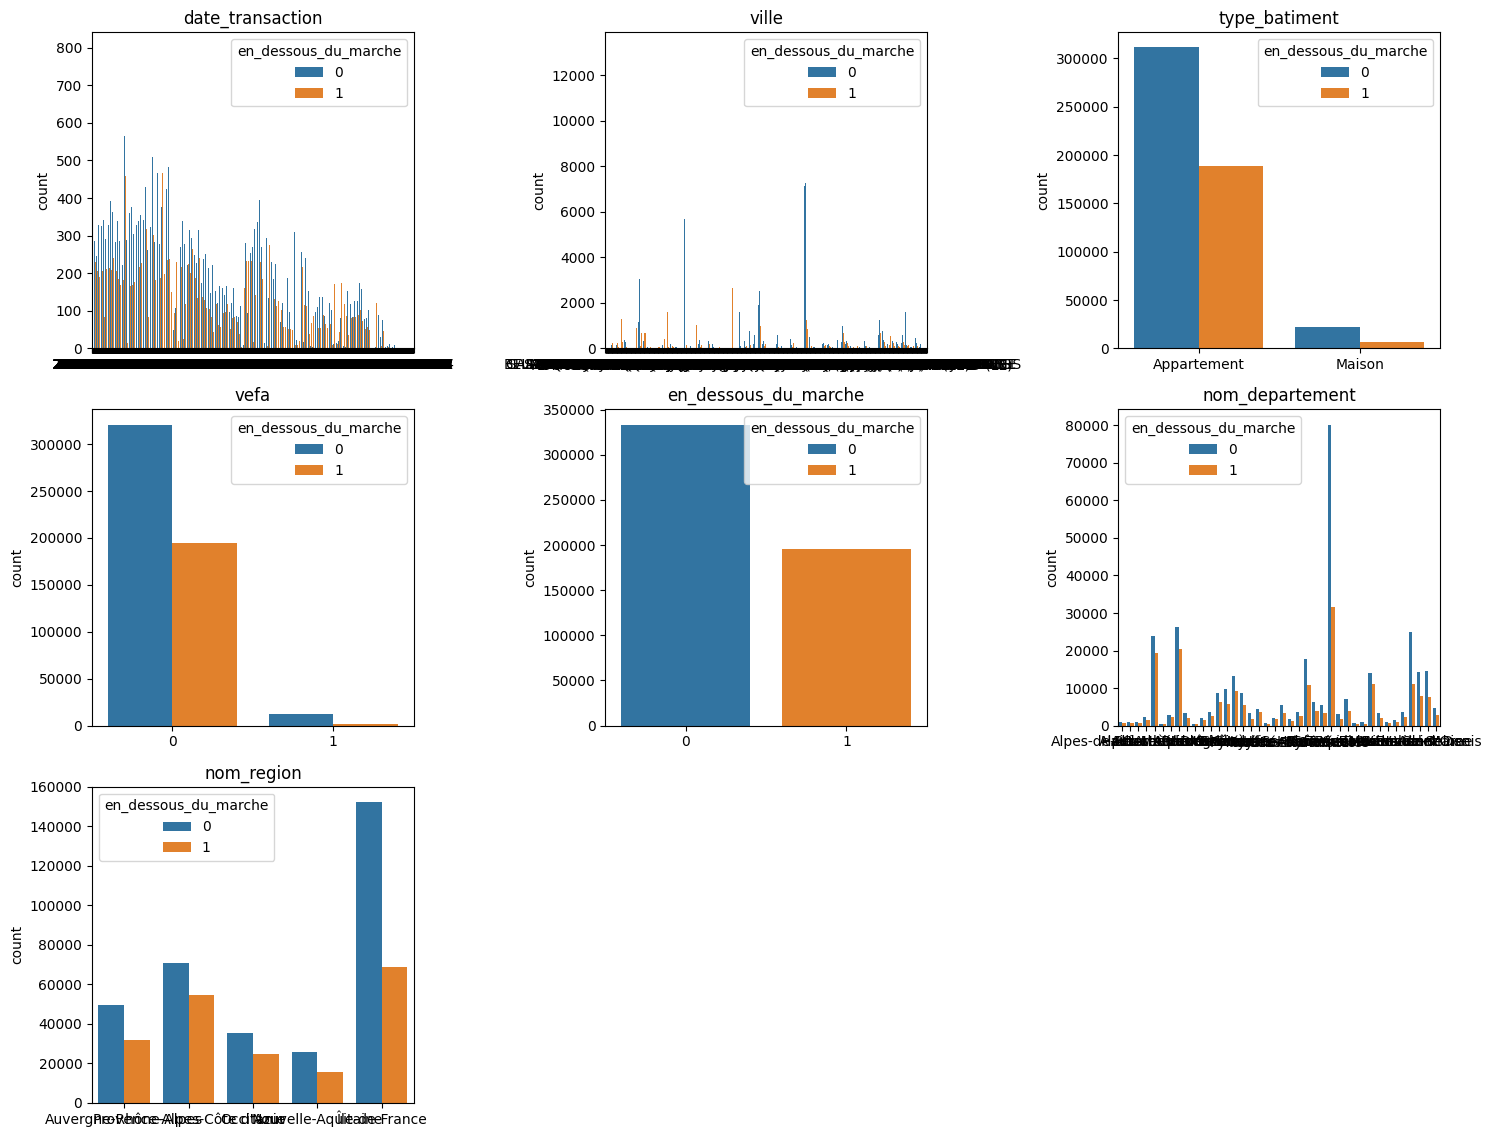

In [27]:
plt.figure(figsize=(15,15))
for i, col in enumerate (categorical_features) :
    plt.subplot(n_rows,n_cols,i+1)
    sns.countplot(data=df, x=col, hue='en_dessous_du_marche')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [37]:
for col in categorical_features:
    # Créer la crosstab entre la variable catégorique et 'en_dessous_du_marche'
    crosstab = pd.crosstab(df[col], df['en_dessous_du_marche'])

    # Affichage de la crosstab
    print(f"Crosstab pour la variable: {col}")
    print(crosstab)
    print("\n" + "-"*50 + "\n")


Crosstab pour la variable: date_transaction
en_dessous_du_marche    0    1
date_transaction              
2018-01-02             28   16
2018-01-03            138   81
2018-01-04            179  117
2018-01-05            262  148
2018-01-06              9    3
...                   ...  ...
2023-06-26             85   59
2023-06-27            125   54
2023-06-28             98   68
2023-06-29            152   95
2023-06-30            161   83

[1747 rows x 2 columns]

--------------------------------------------------

Crosstab pour la variable: ville
en_dessous_du_marche     0     1
ville                           
ABLON-SUR-SEINE         62    24
ABONDANCE                8     3
AGDE                  1094  1034
AGEN                   468   300
AIGUES-MORTES           57    27
...                    ...   ...
VOREPPE                 34    12
VOUNEUIL SOUS BIARD      5     0
VOUNEUIL-SUR-VIENNE      5     0
WISSOUS                 17     4
YERRES                 151   108

[1035 rows x